<a href="https://colab.research.google.com/github/gustahps-0712/MachineLearningProjects/blob/main/Ci%C3%AAncia_de_dados_agroneg%C3%B3cio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de Dados**

In [ ]:
# Importação de pacotes
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from xgboost import plot_importance
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Conexão com os Dados

train_d = pd.read_csv("/content/treino.csv")

In [ ]:
# Vizualização das primeiras linhas

train_d.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


In [ ]:
# Informações do dataset

train_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


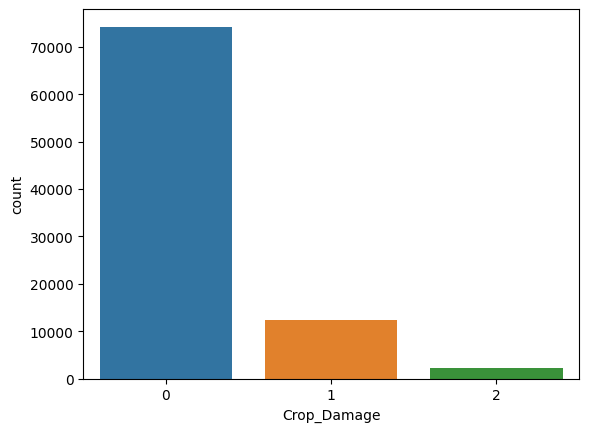

In [ ]:
# Explorando a Variável respsta

train_d["Crop_Damage"].value_counts()
ax = sns.countplot(x=train_d["Crop_Damage"])

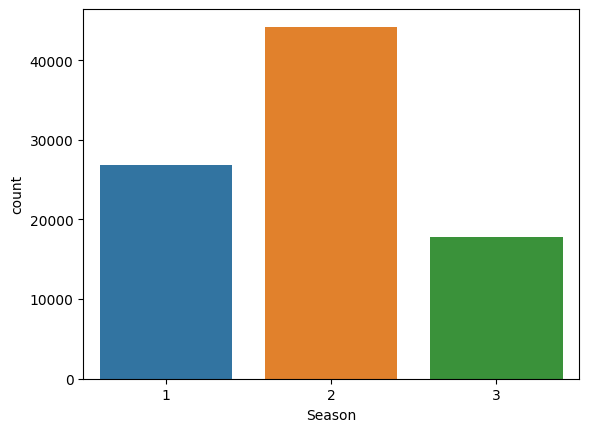

In [ ]:
# Explorando Variável

ax = sns.countplot(x=train_d["Season"])

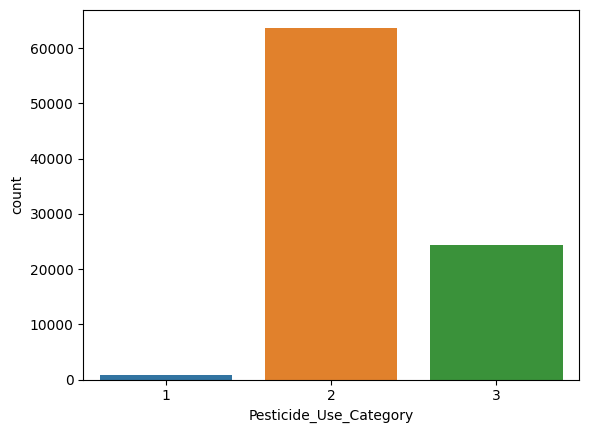

In [ ]:
ax = sns.countplot(x=train_d["Pesticide_Use_Category"])

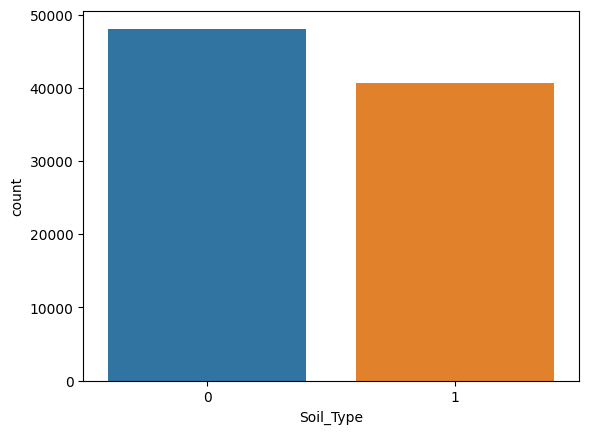

In [ ]:
ax = sns.countplot(x=train_d["Soil_Type"])

In [ ]:
# Verificando Valores nulos

train_d.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [ ]:
# Verificar Valores Duplicados

train_d.duplicated().sum()

0

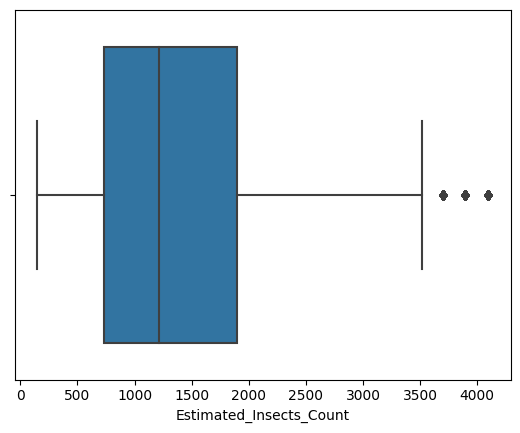

In [ ]:
# Estatística descritiva
train_d["Estimated_Insects_Count"].describe()

ax = sns.boxplot(x=train_d["Estimated_Insects_Count"])

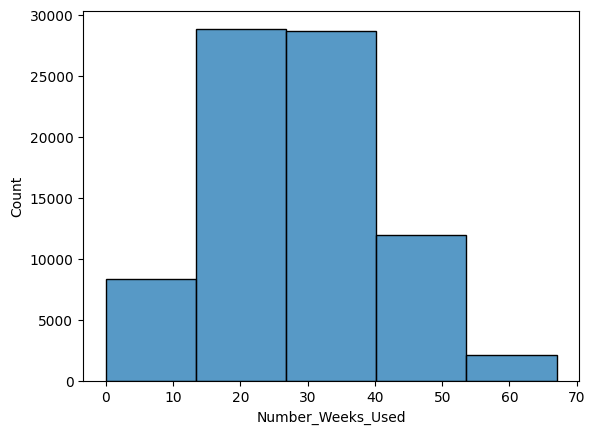

In [ ]:
# Estatística descritiva
train_d["Number_Weeks_Used"].describe()

ax = sns.histplot(x=train_d["Number_Weeks_Used"],bins=5 )

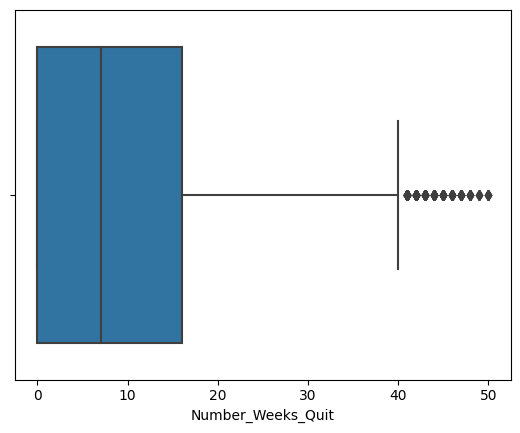

In [ ]:
# Estatística descritiva
train_d["Number_Weeks_Quit"].describe()

ax = sns.boxplot(x=train_d["Number_Weeks_Quit"])

## **Pré Processamento dos Dados**

In [ ]:
# Excluir variável ID 

train_d.drop("ID",axis=1,inplace=True)

train_d.head()


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [ ]:
# Excluir valores nulos

train_d.dropna(inplace=True)
train_d.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [ ]:
# Criação de Variáveis Numéricas
for col in ["Crop_Type","Soil_Type","Pesticide_Use_Category","Season"]:
  train_d = pd.get_dummies(train_d,columns=[col])

train_d.head(3)

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
0,188,0,0.0,0,0,0,1,1,0,1,0,0,1,0,0
1,209,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0
2,257,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0


In [ ]:
# Split Dataset

x = train_d.drop("Crop_Damage",axis=1)
y= train_d["Crop_Damage"].values.reshape(-1,1)

#Dados de treino e de teste


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=7)

## **Construção das Máquinas Preditivas**

In [ ]:
# Treinamento da Maquina Preditiva

Maquina_Preditiva = CatBoostClassifier(n_estimators=1000, max_depth=4, random_state=7)
Maquina_Preditiva.fit(x_train,y_train)
predicoes = Maquina_Preditiva.predict_proba(x_test)

Learning rate set to 0.097814
0:	learn: 0.9832092	total: 12.5ms	remaining: 12.4s
1:	learn: 0.8949168	total: 29.7ms	remaining: 14.8s
2:	learn: 0.8266158	total: 41.8ms	remaining: 13.9s
3:	learn: 0.7706912	total: 55.1ms	remaining: 13.7s
4:	learn: 0.7241909	total: 67.2ms	remaining: 13.4s
5:	learn: 0.6857756	total: 80.2ms	remaining: 13.3s
6:	learn: 0.6533072	total: 93.2ms	remaining: 13.2s
7:	learn: 0.6249385	total: 106ms	remaining: 13.1s
8:	learn: 0.6010892	total: 118ms	remaining: 13s
9:	learn: 0.5798398	total: 131ms	remaining: 13s
10:	learn: 0.5617840	total: 144ms	remaining: 12.9s
11:	learn: 0.5470850	total: 157ms	remaining: 12.9s
12:	learn: 0.5335494	total: 172ms	remaining: 13s
13:	learn: 0.5221289	total: 189ms	remaining: 13.3s
14:	learn: 0.5116100	total: 218ms	remaining: 14.3s
15:	learn: 0.5023982	total: 234ms	remaining: 14.4s
16:	learn: 0.4942070	total: 247ms	remaining: 14.3s
17:	learn: 0.4877251	total: 260ms	remaining: 14.2s
18:	learn: 0.4815039	total: 273ms	remaining: 14.1s
19:	learn:

## **Avaliação das Máquinas Preditivas**

In [ ]:
# Score do modelo nos dados de teste

result = Maquina_Preditiva.score(x_test,y_test)
print(f"Acurácia nos Dados de Teste: {result*100}%")

Acurácia nos Dados de Teste: 80.10270007323736%


In [ ]:
# Variáveis mais importantes

Maquina_Preditiva.feature_importances_

array([21.36537105, 18.29694341, 25.21854051, 11.53187023,  1.84298933,
        1.66553058,  0.92037955,  0.57402227,  0.60262598,  9.50784327,
        6.34740699,  0.78616794,  0.56192349,  0.7783854 ])